# Business Understanding

The company is expanding into both privatized and commercial aviation to diversify its portfolio. They would like to understand which aircraft types have the lowest risk. 
The "AviationData.csv" dataset provided by the NTSB, that will be explored in this notebook, contains information on selected accidents from 1962 to 2023. These are incidents that have taken place within the United States, its territories and possessions, and in international waters.

**Key/focus questions:**
- Which aircraft types have the lowest accident severity?
- Is a private or commercial flight riskier?
- Are certain conditions (e.g., weather, location) more associated with severe accidents?

**Audience**: Aviation division team and the company's stakeholders eg managers 


In [19]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#importing the dataset
df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", encoding='cp1252')

C:\Users\PC\AppData\Local\Temp\ipykernel_7008\1828067197.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", encoding='cp1252')


### Going through the Dataset

In [21]:
#looking into the datasets shape 
df.shape

(88889, 31)

In [22]:
#information on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [15]:
#data types of the columns 
df.dtypes

Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Da

In [23]:
#looking into the first 5 rows of the dataset to get an idea of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [24]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Cleaning the dataset 

Using the head function and looking at the different columns of the dataset, some columns are not required moving forward. 

**Why?** This is because they are not part/helpful in the analysis and will not interfere when forming a data driven conclusion. The columns such as Event Id and Accident number are just for administration purposes and Report status and publication date would be desired for a different type of analysis

In [25]:
#Getting the column names in the dataset

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [29]:
#forming a list of the unrequired columns

unwanted_columns = ['Event.Id', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Registration.Number', 'Accident.Number', 'Report.Status',
       'Publication.Date']
df = df.drop(columns = unwanted_columns)

In [30]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [34]:
# checking for columns with missing values 
missing_count = df.isna().sum()
missing_count

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [40]:
#checking for the percentages of columns with missing values 
#if it is greater than 50%, the columns are to be dropped

row_number = len(df)

missing_percentage = (missing_count / row_number) * 100
missing_percentage.sort_values(ascending = True)

Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058500
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Weather.Condition          5.053494
Total.Uninjured            6.650992
Number.of.Engines          6.844491
Purpose.of.flight          6.965991
Engine.Type                7.982990
Total.Fatal.Injuries      12.826109
Total.Minor.Injuries      13.424608
Total.Serious.Injuries    14.073732
Broad.phase.of.flight     30.560587
Aircraft.Category         63.677170
FAR.Description           63.974170
Air.carrier               81.271023
Schedule                  85.845268
dtype: float64

In [42]:
#dropping the columns with high percentage of missing values

df = df.drop(columns = ['Schedule', 'Air.carrier', 'FAR.Description'])
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [44]:
df.shape

(88889, 19)

In [43]:
#Checking for duplicates in the data 

df.duplicated().value_counts()

False    88854
True        35
Name: count, dtype: int64

In [45]:
#dropping the duplicates 

df = df.drop_duplicates()
df.shape

(88854, 19)

In [46]:
#rechecking duplicates 
df.duplicated().value_counts()

False    88854
Name: count, dtype: int64

#### Filling in the missing values 

Working according to the data types ie categorical or numerical, and the outliers.

In [47]:
df.dtypes 

Investigation.Type         object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object

In [49]:
df.isna().sum().sort_values(ascending = True)

Investigation.Type            0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity             998
Aircraft.damage            3191
Weather.Condition          4490
Total.Uninjured            5908
Number.of.Engines          6080
Purpose.of.flight          6189
Engine.Type                7093
Total.Fatal.Injuries      11398
Total.Minor.Injuries      11926
Total.Serious.Injuries    12503
Broad.phase.of.flight     27158
Aircraft.Category         56577
dtype: int64

#### Handling the numerical columns 

In [64]:
#df['Number.of.Engines'].describe()
#df['Total.Fatal.Injuries'].describe()
#df['Total.Serious.Injuries'].describe()
df['Total.Minor.Injuries'].describe()
#df['Total.Uninjured'].describe()

count    76928.000000
mean         0.357061
std          2.235891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        380.000000
Name: Total.Minor.Injuries, dtype: float64

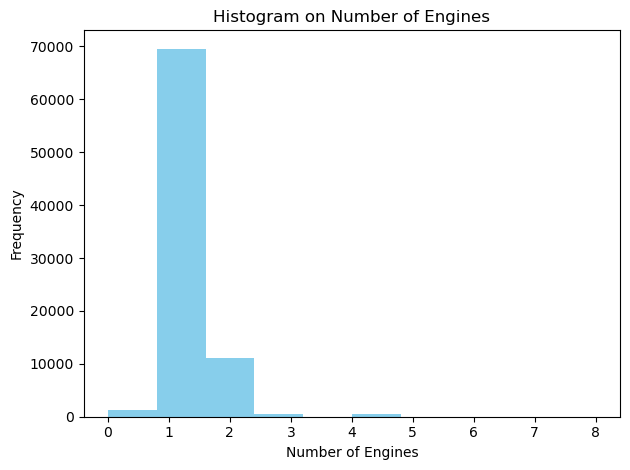

In [52]:


plt.hist(df['Number.of.Engines'], color='skyblue')
plt.title('Histogram on Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

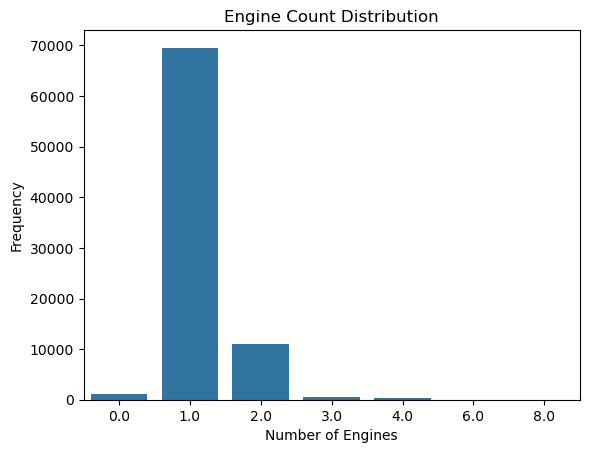

In [53]:
# Visualise with a countplot  

sns.countplot(data=df, x='Number.of.Engines')
plt.title('Engine Count Distribution')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.show()

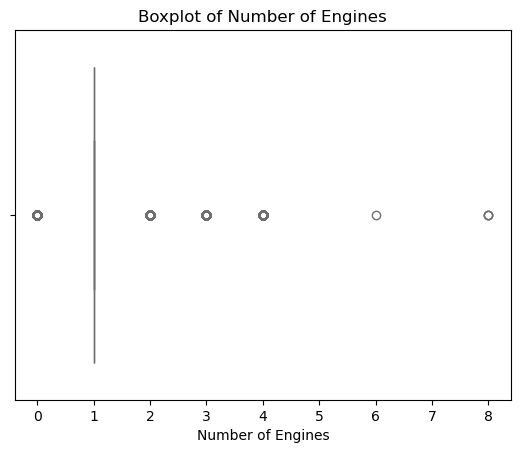

In [56]:
sns.boxplot(x=df['Number.of.Engines'], color='skyblue')
plt.title('Boxplot of Number of Engines')
plt.xlabel('Number of Engines')
plt.show()

In [58]:
# Calculating our first, third quantiles and then later our IQR

numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

IQR

Number.of.Engines         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           2.0
dtype: float64

#### Categorical data